In [18]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling1D, Conv1D, Dropout, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score


In [19]:


# Choose a random color palette
color_palettes = ['BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'RdPu', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']


In [20]:


tweets = pd.read_csv("tweets_clean_with_topics_new.csv")



In [21]:

def get_population_per_topic(tweets, topic):
    # lest sample first:
    sample = tweets[tweets["topic_index"].isin(topic)]
    sample = sample[["clean_text", "target"]]
    sample['target'] = sample['target'].replace(4, 1)

    return sample


def get_embeddings_index():
    embeddings_index = {}
    with open('glove.6B.300d.txt', 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index


def get_embedding_matrix(embedding_dim, word_index, num_words, embeddings_index):
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        if i >= num_words:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix


def get_model(embedding_dim, num_words, embedding_matrix, max_length):
    # Build model
    input_layer = Input(shape=(max_length,), name='input_layer')
    embedding_layer = Embedding(num_words, embedding_dim, weights=[embedding_matrix], trainable=False)(input_layer)
    conv_layer = Conv1D(filters=128, kernel_size=3, activation='relu')(embedding_layer)
    max_pooling_layer = GlobalMaxPooling1D()(conv_layer)
    dense_layer = Dense(64, activation='relu')(max_pooling_layer)
    dropout_layer = Dropout(0.5)(dense_layer)
    output_layer = Dense(1, activation='sigmoid')(dropout_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def get_classification_report(test_labels, predicted_labels):
    print(classification_report(test_labels, predicted_labels))


def get_confusion_matrix(test_labels, predicted_labels, topic, camp):

    plt.figure()
    # Compute confusion matrix
    cm = confusion_matrix(test_labels, predicted_labels)

    # Normalize confusion matrix
    cm_norm = cm / cm.sum()

    # Visualize confusion matrix
    sns.heatmap(cm_norm, annot=True, cmap=camp, fmt='.2%', xticklabels=['negative', 'positive'],
                yticklabels=['negative', 'positive']).set(
        title="Confusion Matrix for Predicting Sentiment of the Tweet for Topic " + str(topic))

    plt.show()


In [22]:

embedding_dim = 300
embeddings_index = get_embeddings_index()


In [23]:

def split_and_preprocess(sample):

   # Split data into training and testing sets
   train_texts, test_texts, train_labels, test_labels = train_test_split(sample['clean_text'], sample['target'], test_size=0.4, random_state=42)

   # Tokenize texts
   # tokenizer = Tokenizer(num_words=10000)
   tokenizer = Tokenizer()
   tokenizer.fit_on_texts(train_texts)
   train_sequences = tokenizer.texts_to_sequences(train_texts)
   test_sequences = tokenizer.texts_to_sequences(test_texts)

   # Pad sequences
   max_length = max([len(sequence) for sequence in train_sequences])
   train_sequences = pad_sequences(train_sequences, maxlen=max_length)
   test_sequences = pad_sequences(test_sequences, maxlen=max_length)

   return  train_sequences,test_sequences,train_labels,test_labels, max_length, tokenizer

def get_f1_score(y_true, y_pred):
   precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
   return f1


def get_accuracy(y_true, y_pred):
   accuracy = np.sum(y_true == y_pred) / len(y_true)
   return accuracy


<AxesSubplot: xlabel='topic_index', ylabel='Count'>

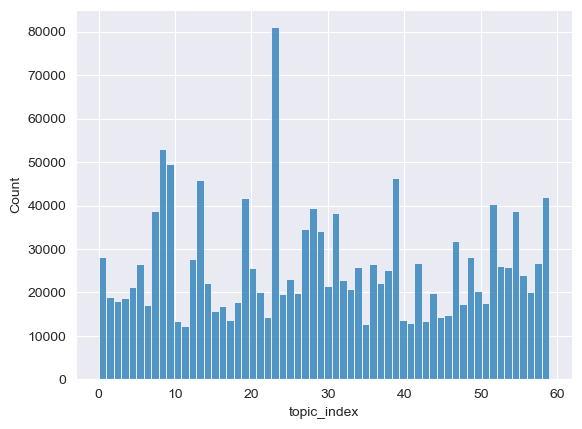

In [24]:


sns.histplot(tweets['topic_index'], bins=60)



### Build sentiment model per topic:

1013/1013 [==============================] - 7s 6ms/step - loss: 1.1819 - accuracy: 0.7371


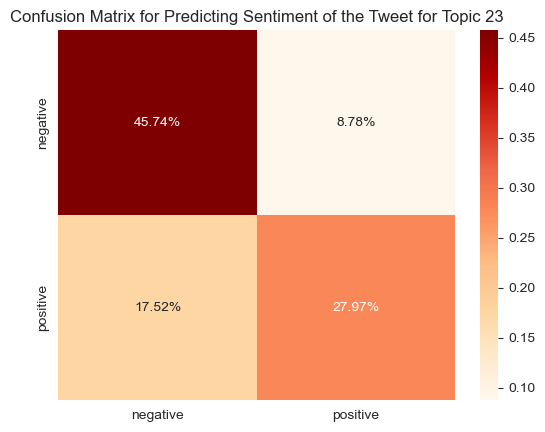

              precision    recall  f1-score   support

           0       0.72      0.84      0.78     17666
           1       0.76      0.61      0.68     14738

    accuracy                           0.74     32404
   macro avg       0.74      0.73      0.73     32404
weighted avg       0.74      0.74      0.73     32404

664/664 [==============================] - 4s 6ms/step - loss: 1.0784 - accuracy: 0.7392


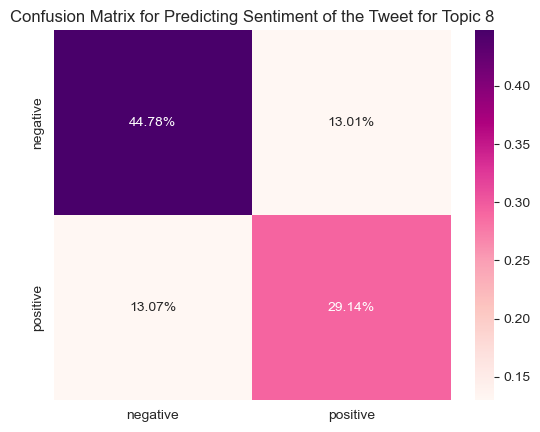

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     12262
           1       0.69      0.69      0.69      8958

    accuracy                           0.74     21220
   macro avg       0.73      0.73      0.73     21220
weighted avg       0.74      0.74      0.74     21220

621/621 [==============================] - 5s 8ms/step - loss: 1.1070 - accuracy: 0.7261


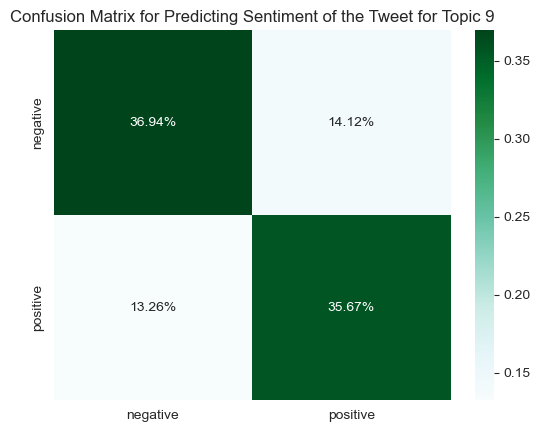

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     10145
           1       0.72      0.73      0.72      9721

    accuracy                           0.73     19866
   macro avg       0.73      0.73      0.73     19866
weighted avg       0.73      0.73      0.73     19866

580/580 [==============================] - 4s 7ms/step - loss: 0.9545 - accuracy: 0.7744


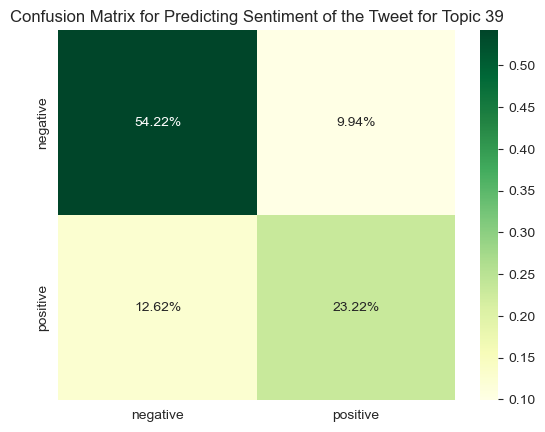

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     11893
           1       0.70      0.65      0.67      6644

    accuracy                           0.77     18537
   macro avg       0.76      0.75      0.75     18537
weighted avg       0.77      0.77      0.77     18537

574/574 [==============================] - 4s 6ms/step - loss: 0.9782 - accuracy: 0.7768


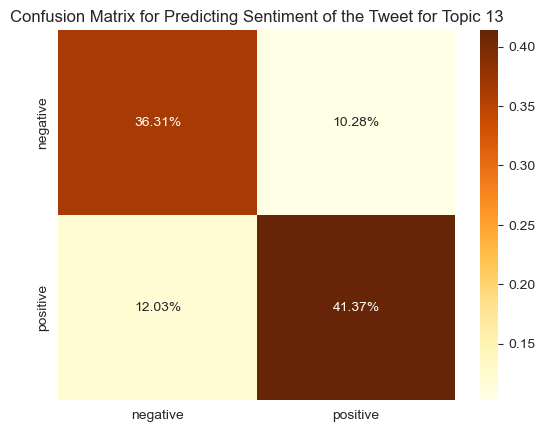

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      8556
           1       0.80      0.77      0.79      9808

    accuracy                           0.78     18364
   macro avg       0.78      0.78      0.78     18364
weighted avg       0.78      0.78      0.78     18364

525/525 [==============================] - 4s 7ms/step - loss: 1.1569 - accuracy: 0.7122


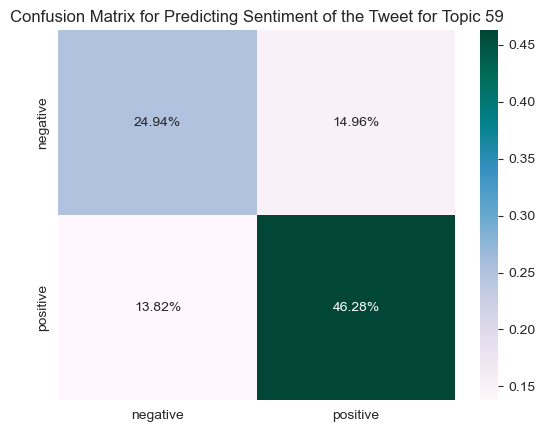

              precision    recall  f1-score   support

           0       0.64      0.63      0.63      6697
           1       0.76      0.77      0.76     10085

    accuracy                           0.71     16782
   macro avg       0.70      0.70      0.70     16782
weighted avg       0.71      0.71      0.71     16782

522/522 [==============================] - 3s 6ms/step - loss: 0.8648 - accuracy: 0.8038


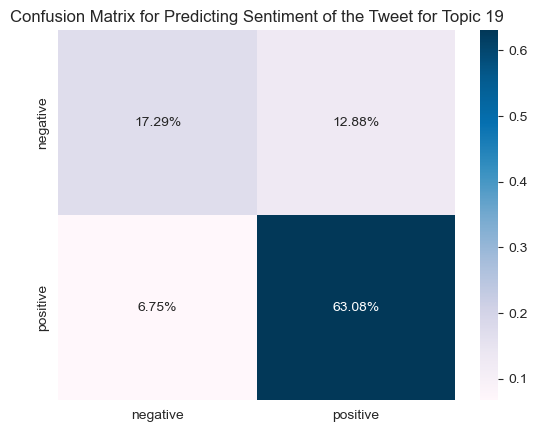

              precision    recall  f1-score   support

           0       0.72      0.57      0.64      5035
           1       0.83      0.90      0.87     11653

    accuracy                           0.80     16688
   macro avg       0.77      0.74      0.75     16688
weighted avg       0.80      0.80      0.80     16688

505/505 [==============================] - 3s 6ms/step - loss: 0.7774 - accuracy: 0.8149


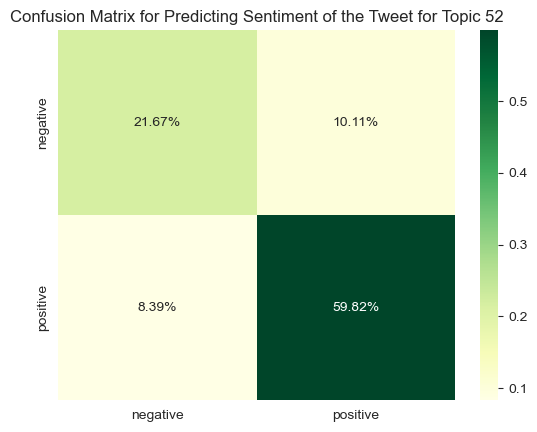

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      5135
           1       0.86      0.88      0.87     11021

    accuracy                           0.81     16156
   macro avg       0.79      0.78      0.78     16156
weighted avg       0.81      0.81      0.81     16156

492/492 [==============================] - 4s 7ms/step - loss: 0.9819 - accuracy: 0.7581


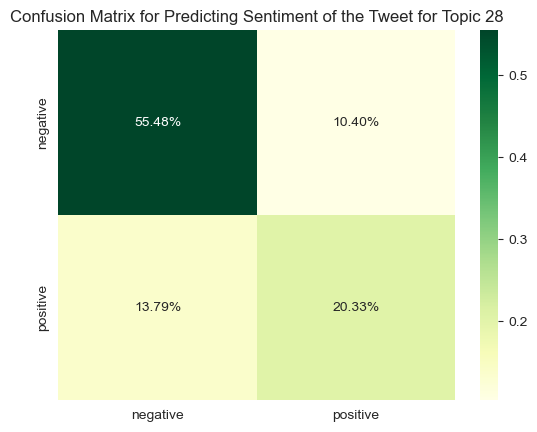

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     10364
           1       0.66      0.60      0.63      5367

    accuracy                           0.76     15731
   macro avg       0.73      0.72      0.72     15731
weighted avg       0.75      0.76      0.75     15731

486/486 [==============================] - 4s 7ms/step - loss: 1.0679 - accuracy: 0.7447


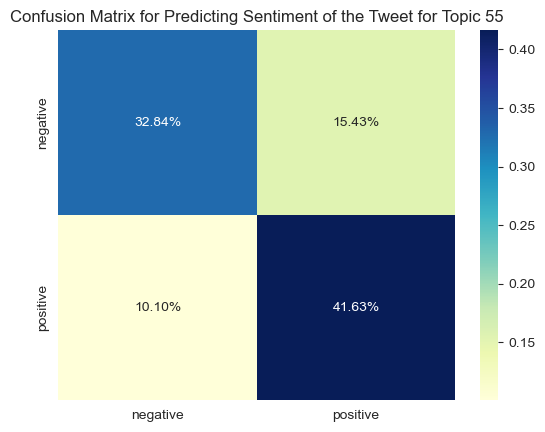

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      7494
           1       0.73      0.80      0.77      8030

    accuracy                           0.74     15524
   macro avg       0.75      0.74      0.74     15524
weighted avg       0.75      0.74      0.74     15524



In [30]:



# get top 10 topics:
topics_counts = tweets["topic_index"].value_counts()
top_10 = topics_counts.nlargest(10)
top_10 = top_10.index.tolist()

overall_results = []


for topic in top_10:
   # sample from topic 1:
   sample = get_population_per_topic(tweets, [topic])

   train_sequences, test_sequences, train_labels, test_labels, max_length, tokenizer = split_and_preprocess(sample)
   embedding_matrix = get_embedding_matrix(embedding_dim=embedding_dim, word_index=tokenizer.word_index,
                                        num_words=len(tokenizer.word_index), embeddings_index=embeddings_index)
   model = get_model(embedding_dim=300, num_words=len(tokenizer.word_index), embedding_matrix=embedding_matrix,
                  max_length=max_length)

   # Train model
   model.fit(train_sequences, train_labels, epochs=20, batch_size=520, validation_data=(test_sequences, test_labels),verbose=0)

   # Predict on test set
   predicted_labels = model.predict(test_sequences)
   predicted_labels = (predicted_labels > 0.5).astype(int)

   # Evaluate model
   loss, accuracy = model.evaluate(test_sequences, test_labels)

   get_confusion_matrix(test_labels,predicted_labels,topic, np.random.choice(color_palettes))

   get_classification_report(test_labels,predicted_labels)

   f1_score_ = get_f1_score(test_labels, predicted_labels)

   overall_results.append([topic, accuracy, f1_score_,loss])



In [31]:

overall_results = pd.DataFrame(overall_results, columns=['topic', 'accuracy', 'f1_score','loss'])
overall_results

,topic,accuracy,f1_score,loss
0,23,0.737070,0.680228,1.181863
1,8,0.739208,0.690873,1.078358
2,9,0.726115,0.722582,1.106960
3,39,0.774397,0.673077,0.954484
4,13,0.776846,0.787602,0.978239
5,59,0.712192,0.762793,1.156890
6,19,0.803751,0.865387,0.864786
7,52,0.814929,0.866039,0.777388
8,28,0.758121,0.626997,0.981881
9,55,0.744653,0.765277,1.067863


### Build Model for all tweets:

In [ ]:


all_topics = tweets['topic_index'].tolist()

# sample from all topics:
sample = get_population_per_topic(tweets, all_topics)

train_sequences, test_sequences, train_labels, test_labels, max_length, tokenizer = split_and_preprocess(sample)
embedding_matrix = get_embedding_matrix(embedding_dim=embedding_dim, word_index=tokenizer.word_index,
                                        num_words=len(tokenizer.word_index), embeddings_index=embeddings_index)
model = get_model(embedding_dim=300, num_words=len(tokenizer.word_index), embedding_matrix=embedding_matrix,
                  max_length=max_length)
model.summary()

# Train model
model.fit(train_sequences, train_labels, epochs=20, batch_size=520, validation_data=(test_sequences, test_labels))

# Predict on test set
predicted_labels = model.predict(test_sequences)
predicted_labels = (predicted_labels > 0.5).astype(int)

# Evaluate model
loss, accuracy = model.evaluate(test_sequences, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

get_confusion_matrix(test_labels,predicted_labels,0, np.random.choice(color_palettes))

get_classification_report(test_labels,predicted_labels)

